#Jonathan Halverson
#Saturday, February 20, 2016

###There are 20 balls in an urn numbered 1 to 20. You randomly pull out 3 balls. What is the probability that the maximum number is 17 or higher of the three balls? We begin with the numerical simulation. Note that the balls are drawn without replacement. 

In [55]:
from random import choice
success = 0
trials = 100000
for _ in xrange(trials):
    balls = range(1, 21)
    b1 = choice(balls)
    balls.remove(b1)
    b2 = choice(balls)
    balls.remove(b2)
    b3 = choice(balls)
    if max(b1, b2, b3) >= 17: success += 1
print float(success) / trials

0.5071


###The analytical solution is given is as follow. The probability of getting a max ball of 20 for instance is choose(19, 2) / choose(20, 3). That is, in the numerator we know we have the 20 ball so there are choose(19, 2) other possibilities of the other two balls. The total number of 3-ball combinations (irrespective of the order drawn) is choose(20, 3). We sum this for 17, 18, 19 and 20:

In [56]:
from scipy.special import binom as choose
p = sum([choose(k - 1, 2) / choose(20, 3) for k in [17, 18, 19, 20]])
print p

0.508771929825


###The game is interesting because the odds are in the favor of the player versus the house, even if by a small margin. 

#ANOVA or Analysis of Variance 

### From OpenIntro we consider the problem of determining if the average on-base percentage of baseball players is dependent on position played on the field. The null hypothesis is that all players have the same mean. ANOVA can be used to evaluate the null hypothesis. We consider four different player positions and 327 samples. Note that one should avoid comparing all combinations of means. This is data snooping and it leads to an increase in type 1 errors because by chance alone there is likely to be a large difference between means if a large number of pairs is considered. See note below for how to correct for this.

###To apply ANOVA the measurements must be independent within each group and across groups, the groups are approximately normal and have similar variances.

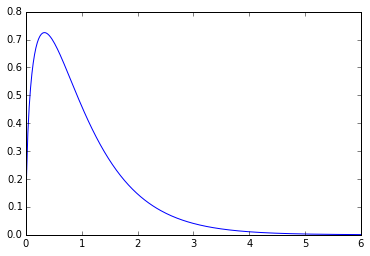

In [57]:
from scipy.stats import f
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0.01, 6, num=250)
groups = 4
samples = 327
df1 = groups - 1
df2 = samples - groups
y = f.pdf(x, df1, df2)
plt.plot(x, y)

###The F statistic is a measure of the ratio of variation between groups to variation within groups (i.e., MSG/MSE). 

In [58]:
F_statistic = 1.994
p_value = 1.0 - f.cdf(F_statistic, df1, df2)
print p_value

0.114744319228


In [59]:
p_value > 0.05

True

#Another example of ANOVA 

###Here is a complete example that uses simulated data: 

In [60]:
from scipy.stats import f_oneway
from scipy.stats import norm

sample1 = norm.rvs(loc=6.9, scale=2.9, size=100)
sample2 = norm.rvs(loc=7.1, scale=2.5, size=90)
sample3 = norm.rvs(loc=7.2, scale=2.3, size=110)
print sample1.mean(), sample1.std()
print sample2.mean(), sample2.std()
print sample3.mean(), sample3.std()
F_statistic, p_value = f_oneway(sample1, sample2, sample3)

6.49919139951 2.49965358593
7.16561389303 2.24641625728
7.27976492321 2.34707880555


In [61]:
print F_statistic, p_value, p_value > 0.05

3.18108089449 0.0429599003341 False


###If one finds that the null hypothesis is rejected, it is natural to find the pair or pairs that are responsible. If one decides to look at pairs using a t-test, the Bonferroni correction should be applied to the significance level. The new significance level is $\alpha / K$, where $K$ is the number of comparisons (k(k-1)/2). 